# Exploring Language Features

This is related to processing the AirBnB reviews.

 - LangDetect, for detecting language
 - TextBlob, for Sentiment Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import folium
import math

'''
NLP tools
'''
from textblob import TextBlob
from langdetect import detect

%matplotlib inline

review_df = pd.read_csv('./reviews.csv')



In [39]:
review_df.head(20)

,listing_id,id,date,reviewer_id,reviewer_name,comments,length,dtype,lang,sentiment
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,<class 'str'>,<class 'str'>,en,0.388021
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,<class 'str'>,<class 'str'>,en,0.600000
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,<class 'str'>,<class 'str'>,en,0.200521
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,<class 'str'>,<class 'str'>,en,0.383333
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,<class 'str'>,<class 'str'>,en,0.466667
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...,<class 'str'>,<class 'str'>,en,0.345000
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...,<class 'str'>,<class 'str'>,en,0.504762
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h...",<class 'str'>,<class 'str'>,en,0.477083
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a...",<class 'str'>,<class 'str'>,en,0.381923
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...,<class 'str'>,<class 'str'>,en,0.465000


In [24]:
review_df['dtype'] = review_df['comments'].apply(lambda x: type(x))

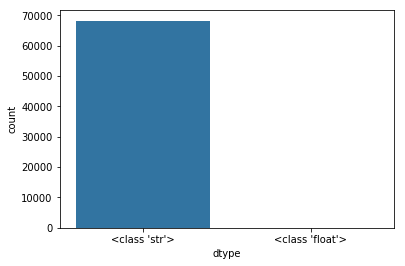

In [25]:
sns.countplot(review_df['dtype'])

In [31]:
def try_to_detect(txt):
    ret = ''
    try:
        ret = detect(txt)
    except:
        ret = ''
    return ret


review_df['lang'] = review_df['comments'].apply(lambda x: '' if isinstance(x, float) else try_to_detect(x) )

In [33]:
review_df.groupby('lang').count()

,listing_id,id,date,reviewer_id,reviewer_name,comments,length,dtype
lang,,,,,,,,
,68,68,68,68,68,16,68,68
af,29,29,29,29,29,29,29,29
ca,27,27,27,27,27,27,27,27
cs,14,14,14,14,14,14,14,14
cy,7,7,7,7,7,7,7,7
da,28,28,28,28,28,28,28,28
de,533,533,533,533,533,533,533,533
el,8,8,8,8,8,8,8,8
en,64523,64523,64523,64523,64523,64523,64523,64523


Aha! There are many non-English reviews that need to be disregarded for sentiment analysis.

In [35]:
review_df['sentiment'] = review_df.query('lang == "en"')['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

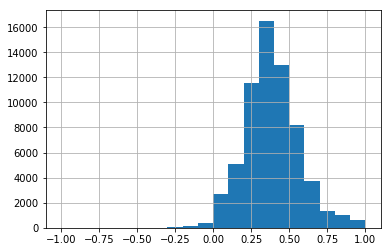

In [38]:
review_df['sentiment'].hist(bins=20)

This shows that almost all reviews are positive, and the majority are moderately positive.